In [3]:
!pip install xelatex

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


ERROR: Could not find a version that satisfies the requirement xelatex (from versions: none)
ERROR: No matching distribution found for xelatex


In [4]:
!pip install --upgrade nbformat
!pip install --upgrade nbconvert

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [5]:
print("Hello World!")

Hello World!


In [6]:
# # This is a sample Python script.
#
# # Press Shift+F10 to execute it or replace it with your code.
# # Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.
#
#
# def print_hi(name):
#     # Use a breakpoint in the code line below to debug your script.
#     print(f'Hi, {name}')  # Press Ctrl+F8 to toggle the breakpoint.
#
#
# # Press the green button in the gutter to run the script.
# if __name__ == '__main__':
#     print_hi('PyCharm')
#
# # See PyCharm help at https://www.jetbrains.com/help/pycharm/

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope, MinCovDet, EmpiricalCovariance
from pyod.models.iforest import IsolationForest
from pyod.models.knn import KNN
from pyod.models.ocsvm import OCSVM
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.hbos import HBOS
from pyod.models.abod import ABOD
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.lscp import LSCP
from pyod.models.mcd import MCD
from pyod.models.pca import PCA

# Load the dataset
data = pd.read_csv(r"C:\Users\smoha\Downloads\Wind_Turbine\CS795---NVDA-Emotion-Synth-main (2)\CARE_To_Compare_Data\CARE_To_Compare\Wind Farm A\Wind Farm A\datasets\0.csv")

# Select all features except time_stamp, asset_id, id, train_test, and status_type_id
features = [col for col in data.columns if col not in ['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id']]
X = data[features]




In [7]:
# Convert string values to numerical values
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)




In [8]:
# Clustering algorithms
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_



In [9]:
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(X_scaled)
agglomerative_labels = agglomerative.labels_



In [10]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
dbscan_labels = dbscan.labels_



In [11]:
meanshift = MeanShift()
meanshift.fit(X_scaled)
meanshift_labels = meanshift.labels_



In [12]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X_scaled)
gmm_labels = gmm.predict(X_scaled)



In [13]:
# Anomaly detection algorithms
lof = LocalOutlierFactor(n_neighbors=20)
lof_scores = lof.fit_predict(X_scaled)



In [14]:
one_class_svm = OneClassSVM(nu=0.1, kernel='rbf', gamma='auto')
one_class_svm.fit(X_scaled)
one_class_svm_scores = one_class_svm.score_samples(X_scaled)



In [15]:
elliptic_envelope = EllipticEnvelope(contamination=0.1)
elliptic_envelope.fit(X_scaled)
elliptic_envelope_scores = elliptic_envelope.decision_function(X_scaled)



In [16]:
isolation_forest = IsolationForest(contamination=0.1)
isolation_forest.fit(X_scaled)
isolation_forest_scores = isolation_forest.decision_function(X_scaled)



In [17]:
knn_outlier_detector = KNN(contamination=0.1)
knn_outlier_detector.fit(X_scaled)
knn_outlier_detector_scores = knn_outlier_detector.decision_function(X_scaled)



In [18]:
ocsvm = OCSVM(contamination=0.1)
ocsvm.fit(X_scaled)
ocsvm_scores = ocsvm.decision_function(X_scaled)



In [19]:
lof_pyod = LOF(contamination=0.1)
lof_pyod.fit(X_scaled)
lof_pyod_scores = lof_pyod.decision_function(X_scaled)



In [20]:
# Try different configurations for CBLOF
try:
    cblof = CBLOF(contamination=0.1)
    cblof.fit(X_scaled)
    cblof_scores = cblof.decision_function(X_scaled)
except ValueError:
    try:
        cblof = CBLOF(n_clusters=5, contamination=0.1)
        cblof.fit(X_scaled)
        cblof_scores = cblof.decision_function(X_scaled)
    except ValueError:
        try:
            from sklearn.cluster import DBSCAN
            cluster_estimator = DBSCAN(eps=0.5, min_samples=5)
            cblof = CBLOF(cluster_estimator=cluster_estimator, contamination=0.1)
            cblof.fit(X_scaled)
            cblof_scores = cblof.decision_function(X_scaled)
        except ValueError:
            cblof_scores = None
            print("Could not find a suitable configuration for CBLOF.")

TypeError: CBLOF.__init__() got an unexpected keyword argument 'cluster_estimator'

In [21]:
cblof = CBLOF(contamination=0.1)
cblof.fit(X_scaled)
cblof_scores = cblof.decision_function(X_scaled)



ValueError: Could not form valid cluster separation. Please change n_clusters or change clustering method

In [22]:
hbos = HBOS(contamination=0.1)
hbos.fit(X_scaled)
hbos_scores = hbos.decision_function(X_scaled)



In [23]:
abod = ABOD(contamination=0.1)
abod.fit(X_scaled)
abod_scores = abod.decision_function(X_scaled)



In [ ]:
feature_bagging = FeatureBagging(contamination=0.1)
feature_bagging.fit(X_scaled)
feature_bagging_scores = feature_bagging.decision_function(X_scaled)



In [ ]:
lscp = LSCP(contamination=0.1)
lscp.fit(X_scaled)
lscp_scores = lscp.decision_function(X_scaled)



In [ ]:
mcd = MCD(contamination=0.1)
mcd.fit(X_scaled)
mcd_scores = mcd.decision_function(X_scaled)



In [ ]:
pca = PCA(contamination=0.1)
pca.fit(X_scaled)
pca_scores = pca.decision_function(X_scaled)



In [ ]:
# Print the results
print("Clustering Results:")
print("KMeans Labels:", kmeans_labels)
print("Agglomerative Clustering Labels:", agglomerative_labels)
print("DBSCAN Labels:", dbscan_labels)
print("Mean Shift Labels:", meanshift_labels)
print("Gaussian Mixture Model Labels:", gmm_labels)

print("\nAnomaly Detection Results:")
print("Local Outlier Factor Scores:", lof_scores)
print("One-Class SVM Scores:", one_class_svm_scores)
print("Elliptic Envelope Scores:", elliptic_envelope_scores)
print("Isolation Forest Scores:", isolation_forest_scores)
print("KNN Outlier Detector Scores:", knn_outlier_detector_scores)
print("OCSVM Scores:", ocsvm_scores)
print("LOF (PyOD) Scores:", lof_pyod_scores)
# print("CBLOF Scores:", cblof_scores)
print("HBOS Scores:", hbos_scores)
print("ABOD Scores:", abod_scores)
# print("Feature Bagging Scores:", feature_bagging_scores)
# print("LSCP Scores:", lscp_scores)
print("MCD Scores:", mcd_scores)
print("PCA Scores:", pca_scores)

Clustering Results:
KMeans Labels: [1 1 1 ... 0 0 0]
Agglomerative Clustering Labels: [1 1 1 ... 0 0 0]
DBSCAN Labels: [0 0 0 ... 0 0 0]
Mean Shift Labels: [3 3 3 ... 0 0 0]
Gaussian Mixture Model Labels: [1 1 1 ... 0 0 0]

Anomaly Detection Results:
Local Outlier Factor Scores: [1 1 1 ... 1 1 1]
One-Class SVM Scores: [1879.40416684 1879.4526401  1879.50110483 ... 1879.50171084 1879.45324657
 1879.40477375]
Elliptic Envelope Scores: [-0.56993017 -0.56971194 -0.56949371 ... -0.56949371 -0.56971194
 -0.56993017]
Isolation Forest Scores: [-0.09631639 -0.09631639 -0.09631639 ... -0.08994321 -0.08994321
 -0.08994321]
KNN Outlier Detector Scores: [0.000252 0.000189 0.000126 ... 0.000126 0.000189 0.000252]
OCSVM Scores: [2118.75346214 2118.34663011 2117.93983084 ... 2117.93864598 2118.34544526
 2118.75227727]
LOF (PyOD) Scores: [1.23388528 1.19686873 1.16396512 ... 1.16396512 1.19686873 1.23388528]
HBOS Scores: [1.36326585 1.36326585 1.36326585 ... 1.36326585 1.36326585 1.36326585]
ABOD Score

In [ ]:
import matplotlib.pyplot as plt
# Visualize clustering results in 2D
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels)
plt.title("KMeans Clustering")

plt.subplot(2, 3, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglomerative_labels)
plt.title("Agglomerative Clustering")

plt.subplot(2, 3, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels)
plt.title("DBSCAN Clustering")

plt.subplot(2, 3, 4)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=meanshift_labels)
plt.title("Mean Shift Clustering")

plt.subplot(2, 3, 5)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels)
plt.title("Gaussian Mixture Model Clustering")

plt.tight_layout()
plt.show()

# Visualize anomaly detection scores in 2D
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=lof_scores)
plt.title("Local Outlier Factor")

plt.subplot(2, 3, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=one_class_svm_scores)
plt.title("One-Class SVM")

plt.subplot(2, 3, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=elliptic_envelope_scores)
plt.title("Elliptic Envelope")

plt.subplot(2, 3, 4)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=isolation_forest_scores)
plt.title("Isolation Forest")

plt.subplot(2, 3, 5)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=knn_outlier_detector_scores)
plt.title("KNN Outlier Detector")

plt.tight_layout()
plt.show()

In [ ]:
data = pd.read_csv(r"C:\Users\smoha\Downloads\Wind_Turbine\0.csv")

(999, 81)
Number of features: 81


c:\Users\smoha\.conda\envs\windturbine\lib\site-packages\sklearn\covariance\_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
c:\Users\smoha\.conda\envs\windturbine\lib\site-packages\pyod\models\lscp.py:382: UserWarning: The number of histogram bins is greater than the number of classifiers, reducing n_bins to n_clf.
  warnings.warn(
c:\Users\smoha\.conda\envs\windturbine\lib\site-packages\sklearn\covariance\_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Clustering Results:
KMeans Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

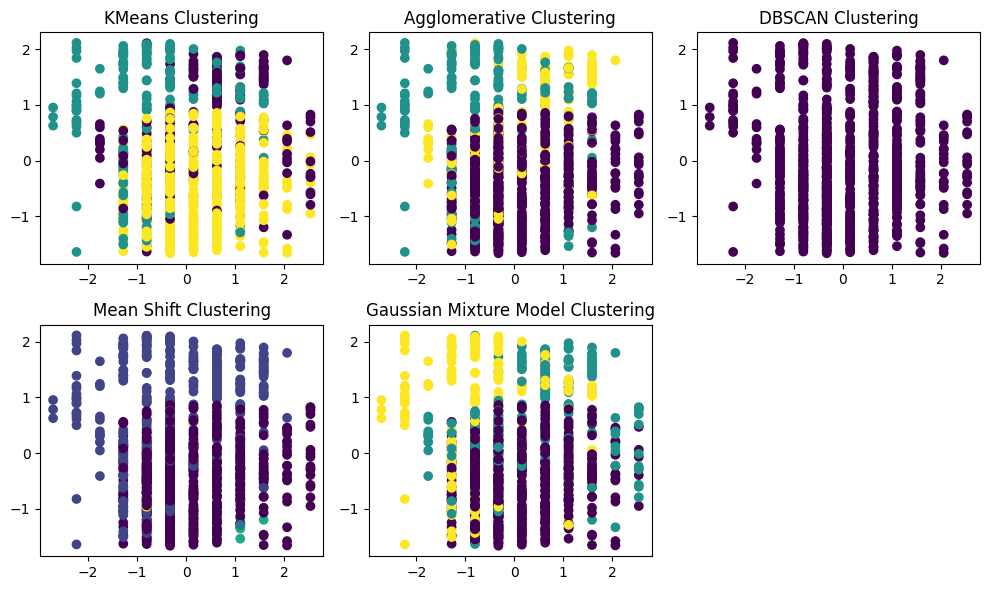

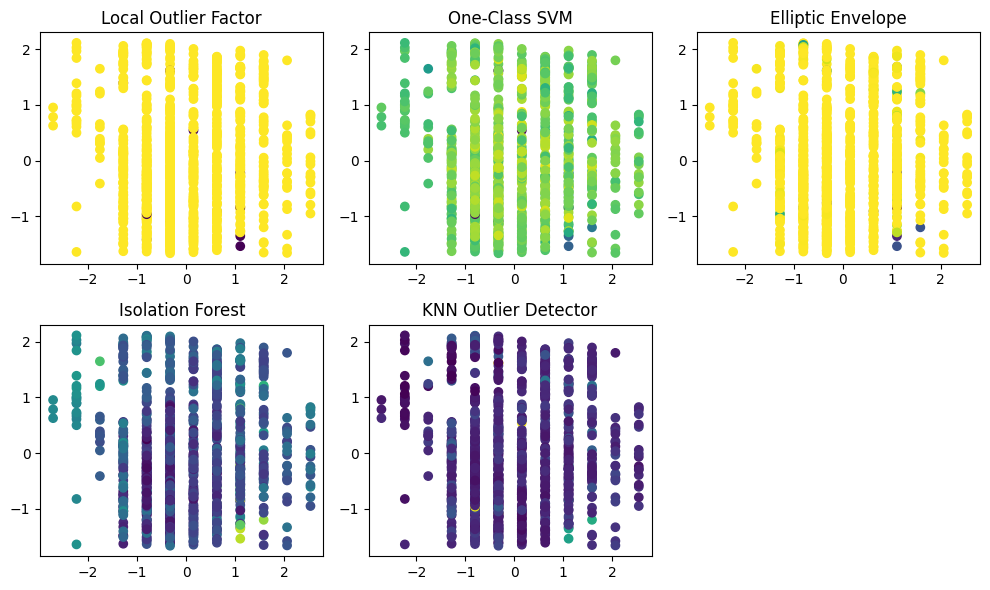

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from pyod.models.iforest import IForest  # Use PyOD's IsolationForest
from pyod.models.knn import KNN
from pyod.models.ocsvm import OCSVM
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.hbos import HBOS
from pyod.models.abod import ABOD
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.lscp import LSCP
from pyod.models.mcd import MCD
from pyod.models.pca import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv(r"C:\Users\smoha\Downloads\Wind_Turbine\0.csv")

# Select all features except time_stamp, asset_id, id, train_test, and status_type_id
features = [col for col in data.columns if col not in ['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id']]
X = data[features]

print(X.shape)

# Convert string values to numerical values
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Check the number of features
n_features = X_scaled.shape[1]
print(f"Number of features: {n_features}")

# Clustering algorithms
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_

agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(X_scaled)
agglomerative_labels = agglomerative.labels_

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
dbscan_labels = dbscan.labels_

meanshift = MeanShift()
meanshift.fit(X_scaled)
meanshift_labels = meanshift.labels_

gmm = GaussianMixture(n_components=3)
gmm.fit(X_scaled)
gmm_labels = gmm.predict(X_scaled)

# Anomaly detection algorithms
lof = LocalOutlierFactor(n_neighbors=20)
lof_scores = lof.fit_predict(X_scaled)

one_class_svm = OneClassSVM(nu=0.1, kernel='rbf', gamma='auto')
one_class_svm.fit(X_scaled)
one_class_svm_scores = one_class_svm.score_samples(X_scaled)

elliptic_envelope = EllipticEnvelope(contamination=0.1)
elliptic_envelope.fit(X_scaled)
elliptic_envelope_scores = elliptic_envelope.decision_function(X_scaled)

isolation_forest = IForest(contamination=0.1)  # Use PyOD's IsolationForest
isolation_forest.fit(X_scaled)
isolation_forest_scores = isolation_forest.decision_function(X_scaled)

knn_outlier_detector = KNN(contamination=0.1)
knn_outlier_detector.fit(X_scaled)
knn_outlier_detector_scores = knn_outlier_detector.decision_function(X_scaled)

ocsvm = OCSVM(contamination=0.1)
ocsvm.fit(X_scaled)
ocsvm_scores = ocsvm.decision_function(X_scaled)

lof_pyod = LOF(contamination=0.1)
lof_pyod.fit(X_scaled)
lof_pyod_scores = lof_pyod.decision_function(X_scaled)

# Try different configurations for CBLOF
try:
    cblof = CBLOF(contamination=0.1)
    cblof.fit(X_scaled)
    cblof_scores = cblof.decision_function(X_scaled)
except ValueError:
    try:
        cblof = CBLOF(n_clusters=5, contamination=0.1)
        cblof.fit(X_scaled)
        cblof_scores = cblof.decision_function(X_scaled)
    except ValueError:
        cblof_scores = None
        print("Could not find a suitable configuration for CBLOF.")

hbos = HBOS(contamination=0.1)
hbos.fit(X_scaled)
hbos_scores = hbos.decision_function(X_scaled)

abod = ABOD(contamination=0.1)
abod.fit(X_scaled)
abod_scores = abod.decision_function(X_scaled)

# Skip FeatureBagging if there is only one feature
if n_features > 1:
    feature_bagging = FeatureBagging(contamination=0.1)
    feature_bagging.fit(X_scaled)
    feature_bagging_scores = feature_bagging.decision_function(X_scaled)
else:
    feature_bagging_scores = None
    print("Skipping FeatureBagging as it requires at least 2 features.")

# Initialize LSCP with base detectors
base_detectors = [
    KNN(contamination=0.1),
    IForest(contamination=0.1)  # Use PyOD's IsolationForest
]

# Fit LSCP and get scores
lscp = LSCP(detector_list=base_detectors, contamination=0.1)
lscp.fit(X_scaled)  # Call the fit method
lscp_scores = lscp.decision_function(X_scaled)

mcd = MCD(contamination=0.1)
mcd.fit(X_scaled)
mcd_scores = mcd.decision_function(X_scaled)

pca = PCA(contamination=0.1)
pca.fit(X_scaled)
pca_scores = pca.decision_function(X_scaled)

# Print the results
print("Clustering Results:")
print("KMeans Labels:", kmeans_labels)
print("Agglomerative Clustering Labels:", agglomerative_labels)
print("DBSCAN Labels:", dbscan_labels)
print("Mean Shift Labels:", meanshift_labels)
print("Gaussian Mixture Model Labels:", gmm_labels)

print("\nAnomaly Detection Results:")
print("Local Outlier Factor Scores:", lof_scores)
print("One-Class SVM Scores:", one_class_svm_scores)
print("Elliptic Envelope Scores:", elliptic_envelope_scores)
print("Isolation Forest Scores:", isolation_forest_scores)
print("KNN Outlier Detector Scores:", knn_outlier_detector_scores)
print("OCSVM Scores:", ocsvm_scores)
print("LOF (PyOD) Scores:", lof_pyod_scores)
if cblof_scores is not None:
    print("CBLOF Scores:", cblof_scores)
print("HBOS Scores:", hbos_scores)
print("ABOD Scores:", abod_scores)
if feature_bagging_scores is not None:
    print("Feature Bagging Scores:", feature_bagging_scores)
print("LSCP Scores:", lscp_scores)
print("MCD Scores:", mcd_scores)
print("PCA Scores:", pca_scores)

# Visualize clustering results
if n_features > 1:
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 3, 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels)
    plt.title("KMeans Clustering")

    plt.subplot(2, 3, 2)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglomerative_labels)
    plt.title("Agglomerative Clustering")

    plt.subplot(2, 3, 3)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels)
    plt.title("DBSCAN Clustering")

    plt.subplot(2, 3, 4)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=meanshift_labels)
    plt.title("Mean Shift Clustering")

    plt.subplot(2, 3, 5)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels)
    plt.title("Gaussian Mixture Model Clustering")

    plt.tight_layout()
    plt.show()
else:
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 3, 1)
    plt.scatter(np.arange(len(X_scaled)), X_scaled[:, 0], c=kmeans_labels)
    plt.title("KMeans Clustering")

    plt.subplot(2, 3, 2)
    plt.scatter(np.arange(len(X_scaled)), X_scaled[:, 0], c=agglomerative_labels)
    plt.title("Agglomerative Clustering")

    plt.subplot(2, 3, 3)
    plt.scatter(np.arange(len(X_scaled)), X_scaled[:, 0], c=dbscan_labels)
    plt.title("DBSCAN Clustering")

    plt.subplot(2, 3, 4)
    plt.scatter(np.arange(len(X_scaled)), X_scaled[:, 0], c=meanshift_labels)
    plt.title("Mean Shift Clustering")

    plt.subplot(2, 3, 5)
    plt.scatter(np.arange(len(X_scaled)), X_scaled[:, 0], c=gmm_labels)
    plt.title("Gaussian Mixture Model Clustering")

    plt.tight_layout()
    plt.show()

# Visualize anomaly detection scores
if n_features > 1:
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 3, 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=lof_scores)
    plt.title("Local Outlier Factor")

    plt.subplot(2, 3, 2)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=one_class_svm_scores)
    plt.title("One-Class SVM")

    plt.subplot(2, 3, 3)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=elliptic_envelope_scores)
    plt.title("Elliptic Envelope")

    plt.subplot(2, 3, 4)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=isolation_forest_scores)
    plt.title("Isolation Forest")

    plt.subplot(2, 3, 5)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=knn_outlier_detector_scores)
    plt.title("KNN Outlier Detector")

    plt.tight_layout()
    plt.show()
else:
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 3, 1)
    plt.scatter(np.arange(len(X_scaled)), X_scaled[:, 0], c=lof_scores)
    plt.title("Local Outlier Factor")

    plt.subplot(2, 3, 2)
    plt.scatter(np.arange(len(X_scaled)), X_scaled[:, 0], c=one_class_svm_scores)
    plt.title("One-Class SVM")

    plt.subplot(2, 3, 3)
    plt.scatter(np.arange(len(X_scaled)), X_scaled[:, 0], c=elliptic_envelope_scores)
    plt.title("Elliptic Envelope")

    plt.subplot(2, 3, 4)
    plt.scatter(np.arange(len(X_scaled)), X_scaled[:, 0], c=isolation_forest_scores)
    plt.title("Isolation Forest")

    plt.subplot(2, 3, 5)
    plt.scatter(np.arange(len(X_scaled)), X_scaled[:, 0], c=knn_outlier_detector_scores)
    plt.title("KNN Outlier Detector")

    plt.tight_layout()
    plt.show()


In [ ]:
# Load the dataset
data = pd.read_csv(r"C:\Users\smoha\Downloads\Wind_Turbine\0.csv")



# Select all features except time_stamp, asset_id, id, train_test, and status_type_id
features = [col for col in data.columns if col not in ['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id']]
X = data[features]

# Extract the status type
status_type = data['status_type_id']

# Convert string values to numerical values
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Check the number of features
n_features = X_scaled.shape[1]
print(f"Number of features: {n_features}")

# Clustering algorithms
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_

agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(X_scaled)
agglomerative_labels = agglomerative.labels_

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
dbscan_labels = dbscan.labels_

meanshift = MeanShift()
meanshift.fit(X_scaled)
meanshift_labels = meanshift.labels_

gmm = GaussianMixture(n_components=3)
gmm.fit(X_scaled)
gmm_labels = gmm.predict(X_scaled)

# Anomaly detection algorithms
lof = LocalOutlierFactor(n_neighbors=20)
lof_scores = lof.fit_predict(X_scaled)

one_class_svm = OneClassSVM(nu=0.1, kernel='rbf', gamma='auto')
one_class_svm.fit(X_scaled)
one_class_svm_scores = one_class_svm.score_samples(X_scaled)

elliptic_envelope = EllipticEnvelope(contamination=0.1)
elliptic_envelope.fit(X_scaled)
elliptic_envelope_scores = elliptic_envelope.decision_function(X_scaled)

isolation_forest = IForest(contamination=0.1)  # Use PyOD's IsolationForest
isolation_forest.fit(X_scaled)
isolation_forest_scores = isolation_forest.decision_function(X_scaled)

knn_outlier_detector = KNN(contamination=0.1)
knn_outlier_detector.fit(X_scaled)
knn_outlier_detector_scores = knn_outlier_detector.decision_function(X_scaled)

ocsvm = OCSVM(contamination=0.1)
ocsvm.fit(X_scaled)
ocsvm_scores = ocsvm.decision_function(X_scaled)

lof_pyod = LOF(contamination=0.1)
lof_pyod.fit(X_scaled)
lof_pyod_scores = lof_pyod.decision_function(X_scaled)

# Try different configurations for CBLOF
try:
    cblof = CBLOF(contamination=0.1)
    cblof.fit(X_scaled)
    cblof_scores = cblof.decision_function(X_scaled)
except ValueError:
    try:
        cblof = CBLOF(n_clusters=5, contamination=0.1)
        cblof.fit(X_scaled)
        cblof_scores = cblof.decision_function(X_scaled)
    except ValueError:
        cblof_scores = None
        print("Could not find a suitable configuration for CBLOF.")

hbos = HBOS(contamination=0.1)
hbos.fit(X_scaled)
hbos_scores = hbos.decision_function(X_scaled)

abod = ABOD(contamination=0.1)
abod.fit(X_scaled)
abod_scores = abod.decision_function(X_scaled)

# Skip FeatureBagging if there is only one feature
if n_features > 1:
    feature_bagging = FeatureBagging(contamination=0.1)
    feature_bagging.fit(X_scaled)
    feature_bagging_scores = feature_bagging.decision_function(X_scaled)
else:
    feature_bagging_scores = None
    print("Skipping FeatureBagging as it requires at least 2 features.")

# Initialize LSCP with base detectors
base_detectors = [
    KNN(contamination=0.1),
    IForest(contamination=0.1)  # Use PyOD's IsolationForest
]

# Fit LSCP and get scores
lscp = LSCP(detector_list=base_detectors, contamination=0.1)
lscp.fit(X_scaled)  # Call the fit method
lscp_scores = lscp.decision_function(X_scaled)

mcd = MCD(contamination=0.1)
mcd.fit(X_scaled)
mcd_scores = mcd.decision_function(X_scaled)

pca = PCA(contamination=0.1)
pca.fit(X_scaled)
pca_scores = pca.decision_function(X_scaled)

# Print the results
print("Clustering Results:")
print("KMeans Labels:", kmeans_labels)
print("Agglomerative Clustering Labels:", agglomerative_labels)
print("DBSCAN Labels:", dbscan_labels)
print("Mean Shift Labels:", meanshift_labels)
print("Gaussian Mixture Model Labels:", gmm_labels)

print("\nAnomaly Detection Results:")
print("Local Outlier Factor Scores:", lof_scores)
print("One-Class SVM Scores:", one_class_svm_scores)
print("Elliptic Envelope Scores:", elliptic_envelope_scores)
print("Isolation Forest Scores:", isolation_forest_scores)
print("KNN Outlier Detector Scores:", knn_outlier_detector_scores)
print("OCSVM Scores:", ocsvm_scores)
print("LOF (PyOD) Scores:", lof_pyod_scores)
if cblof_scores is not None:
    print("CBLOF Scores:", cblof_scores)
print("HBOS Scores:", hbos_scores)
print("ABOD Scores:", abod_scores)
if feature_bagging_scores is not None:
    print("Feature Bagging Scores:", feature_bagging_scores)
print("LSCP Scores:", lscp_scores)
print("MCD Scores:", mcd_scores)
print("PCA Scores:", pca_scores)



Number of features: 81


c:\Users\smoha\.conda\envs\windturbine\lib\site-packages\sklearn\covariance\_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
c:\Users\smoha\.conda\envs\windturbine\lib\site-packages\pyod\models\lscp.py:382: UserWarning: The number of histogram bins is greater than the number of classifiers, reducing n_bins to n_clf.
  warnings.warn(
c:\Users\smoha\.conda\envs\windturbine\lib\site-packages\sklearn\covariance\_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Clustering Results:
KMeans Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 1 1 1
 2 1 1 1 1 1 1 1 1 1 2 2 2 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

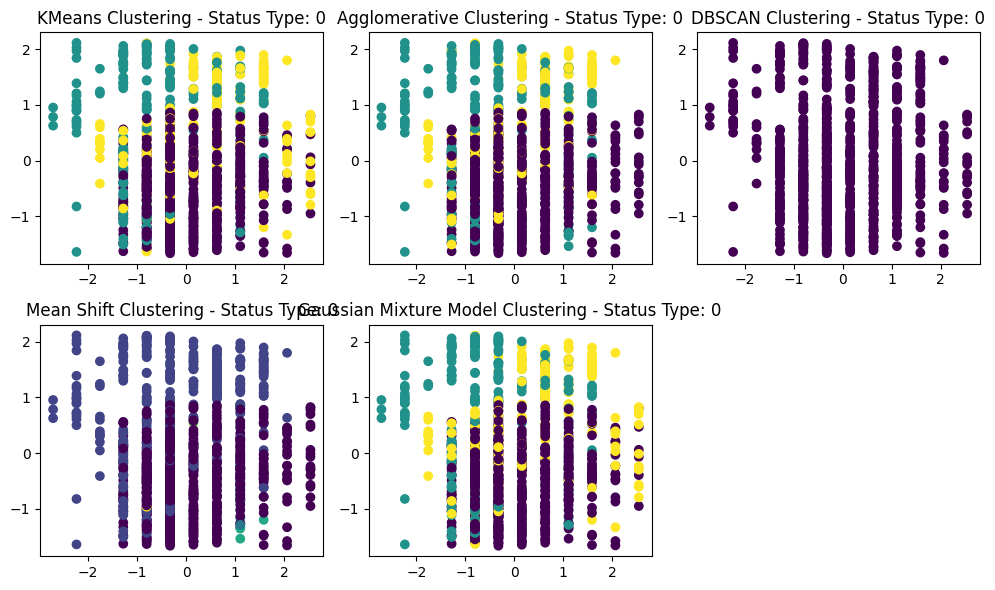

In [ ]:
# Load the dataset
data = pd.read_csv(r"C:\Users\smoha\Downloads\Wind_Turbine\0.csv")

# Extract status_type column from the dataset
status_type = data['status_type_id']

# Visualize clustering results
if n_features > 1:
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 3, 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels)
    plt.title("KMeans Clustering - Status Type: " + str(status_type.iloc[0]))

    plt.subplot(2, 3, 2)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglomerative_labels)
    plt.title("Agglomerative Clustering - Status Type: " + str(status_type.iloc[0]))

    plt.subplot(2, 3, 3)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels)
    plt.title("DBSCAN Clustering - Status Type: " + str(status_type.iloc[0]))

    plt.subplot(2, 3, 4)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=meanshift_labels)
    plt.title("Mean Shift Clustering - Status Type: " + str(status_type.iloc[0]))

    plt.subplot(2, 3, 5)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels)
    plt.title("Gaussian Mixture Model Clustering - Status Type: " + str(status_type.iloc[0]))

    plt.tight_layout()
    plt.show()
else:
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 3, 1)
    plt.scatter(np.arange(len(X_scaled)), X_scaled[:, 0], c=kmeans_labels)
    plt.title("KMeans Clustering - Status Type: " + str(status_type.iloc[0]))

    plt.subplot(2, 3, 2)
    plt.scatter(np.arange(len(X_scaled)), X_scaled[:, 0], c=agglomerative_labels)
    plt.title("Agglomerative Clustering - Status Type: " + str(status_type.iloc[0]))

    plt.subplot(2, 3, 3)
    plt.scatter(np.arange(len(X_scaled)), X_scaled[:, 0], c=dbscan_labels)
    plt.title("DBSCAN Clustering - Status Type: " + str(status_type.iloc[0]))

    plt.subplot(2, 3, 4)
    plt.scatter(np.arange(len(X_scaled)), X_scaled[:, 0], c=meanshift_labels)
    plt.title("Mean Shift Clustering - Status Type: " + str(status_type.iloc[0]))

    plt.subplot(2, 3, 5)
    plt.scatter(np.arange(len(X_scaled)), X_scaled[:, 0], c=gmm_labels)
    plt.title("Gaussian Mixture Model Clustering - Status Type: " + str(status_type.iloc[0]))

    plt.tight_layout()
    plt.show()
